In [1]:
import numpy as np 

def create_dataset():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [2]:
group, labels = create_dataset()
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [3]:
labels

['A', 'A', 'B', 'B']

In [4]:
# 开始实现k临近算法
def classfiy0(x, dataset, labels, k):
    dataset_size = dataset.shape[0]
    diffmat = np.tile(x, (dataset_size, 1)) - dataset
    sq_diffmat = diffmat ** 2
    sq_distance = sq_diffmat.sum(axis = 1)
    distances = sq_distance ** 0.5
    # 到此位置都是在计算距离
    # diffmat 计算了x到dataset中所有点的坐标差，然后sq_distance计算了平方距离再开根号即为最终的距离
    # 当然这里可以不用开根号直接比较也是没问题的

    sorted_dis_indicies = distances.argsort()
    # 对距离进行排序
    class_count = {}
    for i in range(k):
        vote_i_label = labels[sorted_dis_indicies[i]]
        class_count[vote_i_label] = class_count.get(vote_i_label, 0) + 1
    # 对距离最近的k个点的标签进行计数
    sorted_class_count = sorted(class_count.items(), 
                                key=lambda x: x[1], reverse=True)
    # 按照字典的值进行排序，即标签的个数排序
    return sorted_class_count[0][0]

In [5]:
def file2matrix(filename):
    # datingTestSet2.txt中储存了一些约会对象的三个数值特征和对应的标签
    fr = open(filename)
    array_of_lines = fr.readlines()
    number_of_lines = len(array_of_lines)
    return_mat = np.zeros((number_of_lines, 3))
    class_label_vector = []
    # 读取数据，其中前三列是特征，最后一列是标签
    index = 0
    for line in array_of_lines:
        line = line.strip()
        list_from_line = line.split()
        return_mat[index, :] = list_from_line[0:3]
        class_label_vector.append(int(list_from_line[-1]))
        index += 1
    fr.close()
    return return_mat, class_label_vector

In [6]:
dating_data_mat, dating_labels = file2matrix('datingTestSet2.txt')

In [7]:
dating_data_mat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [8]:
dating_labels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

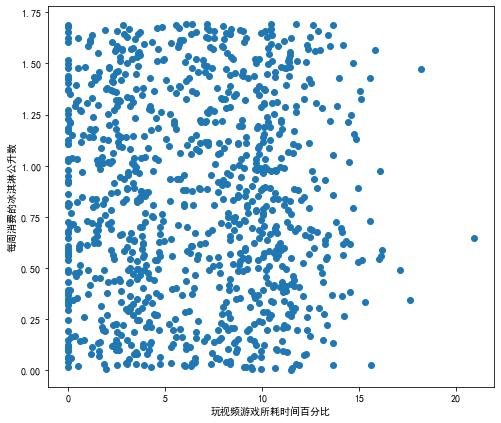

In [12]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = 'SimHei'
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111,
                     xlabel = '玩视频游戏所耗时间百分比',
                     ylabel = '每周消费的冰淇淋公升数')
ax.scatter(dating_data_mat[:,1], dating_data_mat[:,2])
plt.show()

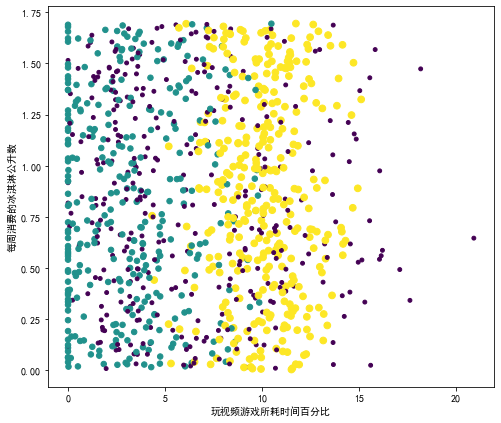

In [15]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111,
                     xlabel = '玩视频游戏所耗时间百分比',
                     ylabel = '每周消费的冰淇淋公升数')
ax.scatter(dating_data_mat[:,1], dating_data_mat[:,2], 
            15.0 * np.array(dating_labels), 15.0 * np.array(dating_labels))
plt.show()

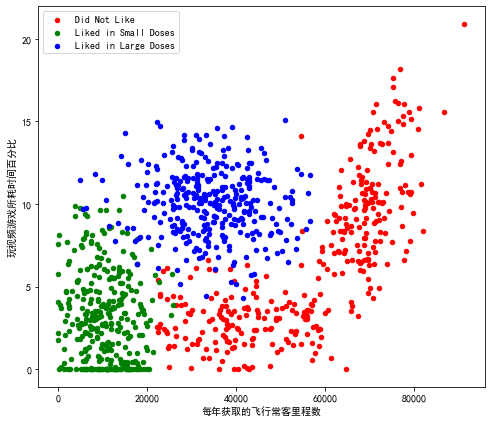

In [16]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111,
                     xlabel = '每年获取的飞行常客里程数',
                     ylabel = '玩视频游戏所耗时间百分比')
index1 = np.array(dating_labels) == 1
index2 = np.array(dating_labels) == 2
index3 = np.array(dating_labels) == 3
xcord1, ycord1 = dating_data_mat[index1,0], dating_data_mat[index1,1]
xcord2, ycord2 = dating_data_mat[index2,0], dating_data_mat[index2,1]
xcord3, ycord3 = dating_data_mat[index3,0], dating_data_mat[index3,1]
type1 = ax.scatter(xcord1, ycord1, s=20, c='red')
type2 = ax.scatter(xcord2, ycord2, s=20, c='green')
type3 = ax.scatter(xcord3, ycord3, s=20, c='blue')
ax.legend([type1, type2, type3], ["Did Not Like", "Liked in Small Doses", "Liked in Large Doses"], loc=2)
plt.show()

In [29]:
def auto_norm(dataset):
    """对数值进行归一化"""
    min_vals = dataset.min(0)   # min(0) 返回每列的最小值，无参数返回整体的最小值
    max_vals = dataset.max(0)
    ranges = max_vals - min_vals
    norm_dataset = np.zeros(dataset.shape)
    m = dataset.shape[0]
    norm_dataset = dataset - np.tile(min_vals, (m, 1))
    norm_dataset = norm_dataset / np.tile(ranges, (m, 1))  # 其实这里不用tile也可以，靠广播机制也能完成目的
    # 计算最大最小值然后计算range，通过减去最小值除以range的方法来归一化
    return norm_dataset, ranges, min_vals

In [30]:
norm_mat, ranges, min_vals = auto_norm(dating_data_mat)
norm_mat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [31]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [32]:
min_vals

array([0.      , 0.      , 0.001156])

In [41]:
def dating_class_test():
    """分类器针对约会网站的测试代码"""
    ho_ratio = 0.10
    dating_data_mat, dating_labels = file2matrix("datingTestSet2.txt")
    norm_mat, ranges, min_vals = auto_norm(dating_data_mat)
    m = norm_mat.shape[0]
    num_test_vecs = int(m * ho_ratio)
    error_count = 0.0

    for i in range(num_test_vecs):
        classfier_res = classfiy0(norm_mat[i,:], norm_mat[num_test_vecs:m,:], 
                                    dating_labels[num_test_vecs:m], 3)
        print("The classifier came back with: %d, the real answer is %d"
               %(classfier_res, dating_labels[i]))
        if (classfier_res != dating_labels[i]):
            error_count += 1.0
    print("The total error rate is %f" %(error_count / float(num_test_vecs)))

In [42]:
dating_class_test()

The classifier came back with: 3, the real answer is 3
The classifier came back with: 2, the real answer is 2
The classifier came back with: 1, the real answer is 1
The classifier came back with: 1, the real answer is 1
The classifier came back with: 1, the real answer is 1
The classifier came back with: 1, the real answer is 1
The classifier came back with: 3, the real answer is 3
The classifier came back with: 3, the real answer is 3
The classifier came back with: 1, the real answer is 1
The classifier came back with: 3, the real answer is 3
The classifier came back with: 1, the real answer is 1
The classifier came back with: 1, the real answer is 1
The classifier came back with: 2, the real answer is 2
The classifier came back with: 1, the real answer is 1
The classifier came back with: 1, the real answer is 1
The classifier came back with: 1, the real answer is 1
The classifier came back with: 1, the real answer is 1
The classifier came back with: 1, the real answer is 1
The classi

In [43]:
def classify_person():
    result_lst = ['not at all', 'in small doses', 'in large doses']
    percent_tats = float(input("percentage of time spent playting video games?"))
    ff_miles = float(input("frequent flier miles earned per year?"))
    pass